In [4]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

In [5]:
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("mpl", matplotlib.__version__)
print("sklearn", sklearn.__version__)

pandas 0.24.1
numpy 1.15.4
mpl 3.0.2
sklearn 0.20.2


In [6]:
from IPython.display import Image
%matplotlib inline

In [9]:
from sklearn import datasets
iris = datasets.load_iris()

In [11]:
X = iris.data[:, [2,3]]
y = iris.target

In [13]:
np.unique(y)

array([0, 1, 2])

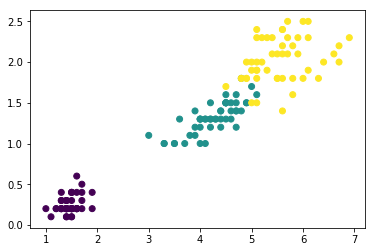

In [17]:
import matplotlib.pyplot as plt

_ = plt.scatter(X[:,0], X[:,1], c=y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1, 
                                        stratify=y)

In [19]:
print("label counts in y: ", np.bincount(y))

label counts in y:  [50 50 50]


In [20]:
np.bincount(y_train), np.bincount(y_test)

(array([35, 35, 35]), array([15, 15, 15]))

In [22]:
from sklearn.preprocessing import StandardScaler
StandardScaler?

In [34]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

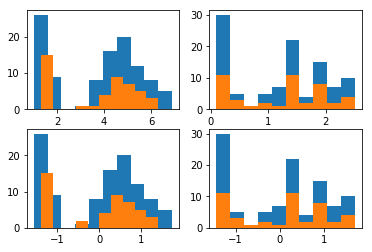

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=2)
_ = axes[0,0].hist(X_train[:,0], label="train")
_ = axes[0,0].hist(X_test[:,0], label="test")
_ = axes[0,1].hist(X_train[:,1], label="train")
_ = axes[0,1].hist(X_test[:,1], label="test")
_ = axes[1,0].hist(X_train_std[:,0], label="train")
_ = axes[1,0].hist(X_test_std[:,0], label="test")
_ = axes[1,1].hist(X_train_std[:,1], label="train")
_ = axes[1,1].hist(X_test_std[:,1], label="test")

In [40]:
from sklearn.linear_model import Perceptron

In [47]:
ppn = Perceptron(n_iter=40, eta0=.1, random_state=1)

In [48]:
ppn

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
ppn.fit(X_train_std, y_train)

/home/hannah/miniconda3/envs/datasci/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
y_pred = ppn.predict(X_test_std)

In [53]:
"Missclassified: ", (y_test!=y_pred).sum()

('Missclassified: ', 9)

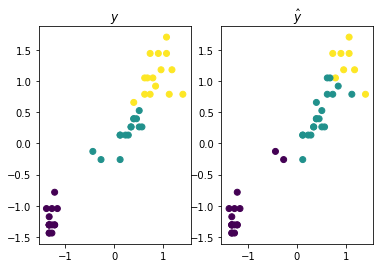

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
_ = ax1.set_title("$y$")
_ = ax2.set_title("$\hat{y}$")
_ = ax1.scatter(X_test_std[:,0], X_test_std[:,1], c=y_test)
_ = ax2.scatter(X_test_std[:,0], X_test_std[:,1], c=y_pred)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test, y_pred)

0.8

In [60]:
ppn.score(X_test_std, y_test)

0.8

In [61]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [63]:
X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined_std.shape

(150, 2)

In [67]:
y_combined = np.hstack((y_train, y_test))
y_combined.shape

(150,)

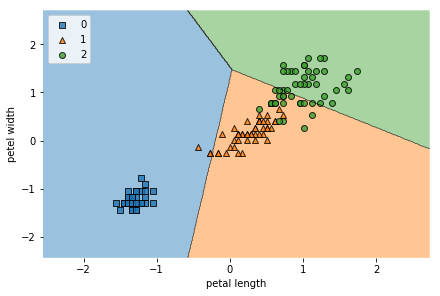

In [77]:
fig, ax = plt.subplots(constrained_layout=True)
plot_decision_regions(X=X_combined_std, y=y_combined, clf=ppn, ax=ax)
_ = ax.set_xlabel("petal length")
_ = ax.set_ylabel("petel width")
_ = ax.legend(loc='upper left')


In [78]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

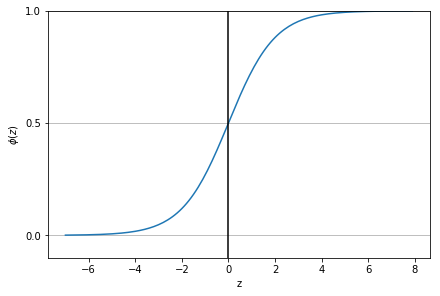

In [99]:
z = np.arange(-7, 8, 0.1)
phi_z = sigmoid(z)

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(z, phi_z)
ax.axvline(0.0, color='k')
ax.set_ylim(-0.1, 1.0)
ax.set_ylabel('$\phi (z)$')
ax.set_xlabel('z')
ax.set_yticks([0.0, 0.5, 1.0])
ax.yaxis.grid(True)



In [87]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

In [101]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

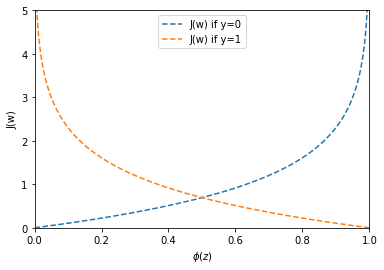

In [102]:
fig, ax = plt.subplots()
_ = ax.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
_ = ax.plot(phi_z, c1, linestyle='--', label='J(w) if y=1')
_ = ax.legend()
_ = ax.set_ylim([0, 5])
_ = ax.set_xlim([0,1])
_ = ax.set_xlabel("$\phi(z)$")
_ = ax.set_ylabel("J(w)")


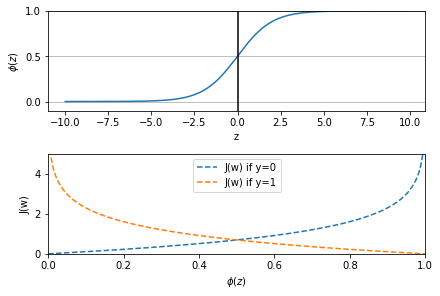

In [103]:
#https://en.wikipedia.org/wiki/Logistic_regression
fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
_ = ax1.plot(z, phi_z)
_ = ax1.axvline(0.0, color='k')
_ = ax1.set_ylim(-0.1, 1.0)
_ = ax1.set_ylabel('$\phi (z)$')
_ = ax1.set_xlabel('z')
_ = ax1.set_yticks([0.0, 0.5, 1.0])
_ = ax1.yaxis.grid(True)

_ = ax2.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
_ = ax2.plot(phi_z, c1, linestyle='--', label='J(w) if y=1')
_ = ax2.legend()
_ = ax2.set_ylim([0, 5])
_ = ax2.set_xlim([0,1])
_ = ax2.set_xlabel("$\phi(z)$")
_ = ax2.set_ylabel("J(w)")


In [104]:
X_train_01_subset = X_train[(y_train==0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

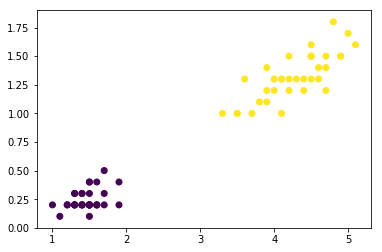

In [107]:
_ = plt.scatter(X_train_01_subset[:,0], X_train_01_subset[:,1], 
            c=y_train_01_subset)

In [114]:
from sklearn.linear_model import LogisticRegression

lrgd = LogisticRegression(C=100.0, random_state=1)
lrgd

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

/home/hannah/miniconda3/envs/datasci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'width')

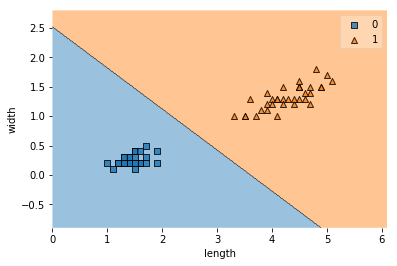

In [118]:
plot_decision_regions(X_train_01_subset, y_train_01_subset, clf=lrgd)
plt.xlabel("length")
plt.ylabel("width")

In [119]:
lr = LogisticRegression(C=100.0, random_state=1)

In [120]:
lr.fit(X_train_std, y_train)

/home/hannah/miniconda3/envs/datasci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hannah/miniconda3/envs/datasci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Text(0, 0.5, 'width')

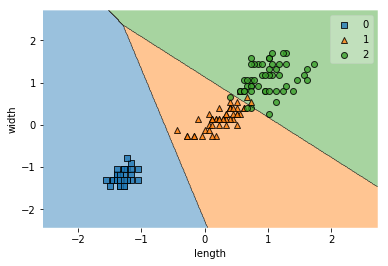

In [122]:
plot_decision_regions(X_combined_std, y_combined, lr)
plt.xlabel("length")
plt.ylabel("width")

In [124]:
lr.score(X_test_std, y_test)

0.9777777777777777

In [131]:
lr.predict_proba(X_test_std)

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13],
       [4.99047943e-05, 6.42479627e-01, 3.57470468e-01],
       [3.50271500e-04, 9.72567065e-01, 2.70826638e-02],
       [2.61983434e-03, 9.95416296e-01, 1.96386998e-03],
       [1.13711813e-07, 3.66207648e-01, 6.33792238e-01],
       [1.48239745e-04, 9.07183723e-01, 9.26680372e-02],
       [3.67510540e-07, 2.61274874e-01, 7.38724758e-01],
       [8.87907061e-01, 1.12092939e-01, 5.78313202e-13],
       [8.62654857e-01, 1.37345143e-01, 1.62620818e-12],
       [2.96682026e-06, 2.85893219e-01, 7.14103814e-01],
       [8.18726653e-01, 1.81273347e-01, 2.20136928e-13],
       [1.18447198e-01, 8.81547262e-01, 5.54041413e-06],
       [8.18726653e-01, 1.81273347e-01, 2.20136928e-13],
       [6.58797784e-05, 8.61857284e-01, 1.38076836e-01],
       [8.51594837e-08, 1.07403552e-01, 8.92596363e-01],
       [1.48239745e-04, 9.07183

In [134]:
lr.predict_proba(X_test_std).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

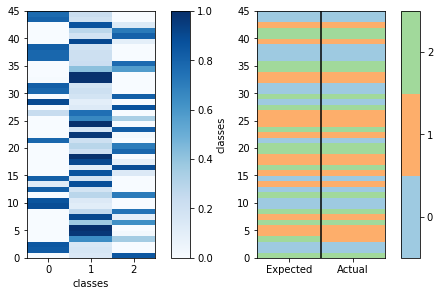

In [245]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)

pnorm = mcolors.Normalize(vmin=0, vmax=1)
pcmap = mcm.Blues
im = ax1.pcolormesh(lr.predict_proba(X_test_std), norm=pnorm, cmap=pcmap)
_ = ax1.set_xticks([.5, 1.5, 2.5])
_ = ax1.set_xticklabels([0,1,2])
_ = ax1.set_xlabel("classes")

ccmap = mcolors.ListedColormap([mcm.tab20c(2), mcm.tab20c(6), mcm.tab20c(10)])
cnorm = mcolors.BoundaryNorm([-.5, .5, 1.5, 2.5], ccmap.N)
im2 = ax2.pcolormesh(np.vstack([y_test, lr.predict(X_test_std)]).T, 
                               cmap=ccmap, norm=cnorm)
ax2.set_xticks([.5, 1.5])
ax2.set_xticklabels(["Expected", "Actual"])
ax2.axvline(x=1, color='k')
cb = fig.colorbar(im, ax=ax1)
_ = cb.set_label("p(being in class)")
cb2 = fig.colorbar(im2, ax=ax2)
cb2.set_ticks([0,1,2])
cb.set_label("classes")


In [246]:
mi = (y_test != lr.predict(X_test_std)).nonzero()[0][0]
mx, my = X_test_std[mi].squeeze()
mx, my, mi

(0.3962503593498341, 0.659260806192252, 3)

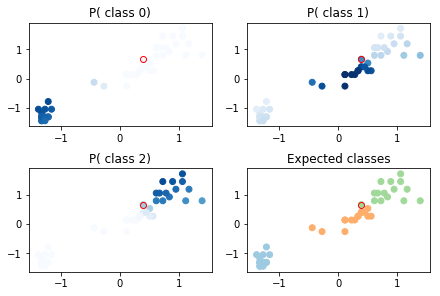

In [271]:
import matplotlib.colors as mcolors
pp = lr.predict_proba(X_test_std)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
for i, ax in enumerate(axes.flatten()):
    if i == 3:
        colors = y_test
        cmap = ccmap
        norm = cnorm
        title = "Expected classes"
    else: 
        colors = pp[:,i]
        norm = pnorm
        cmap = pcmap
        title = f"P( class {i})"
        
    _ = ax.set_title(title)   
    im = ax.scatter(X_test_std[:,0], X_test_std[:, 1], c=colors, cmap=cmap, norm=norm)
    _ = ax.scatter(mx, my, color=cmap(norm(colors[mi])), edgecolor='Red')

In [154]:
lr.predict_proba(X_test_std).argmax(axis=1)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [155]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [157]:
(lr.predict_proba(X_test_std).argmax(axis=1)!=y_test).sum()

1

In [161]:
(lr.predict_proba(X_test_std).argmax(axis=1)!=lr.predict(X_test_std)).sum()

0

In [190]:
axes.shape

(2, 2)

In [191]:
axes.flatten().shape

(4,)